In [162]:
from astropy.io import fits

In [163]:
import matplotlib.pyplot as plt

In [164]:
# https://data.sdss.org/sas/dr17/env/MANGA_MORPHOLOGY/galaxyzoo3d/v4_0_0/
# https://www.sdss.org/dr18/data_access/value-added-catalogs/?vac_id=81

In [165]:
# https://data.sdss.org/datamodel/files/MANGA_MORPHOLOGY/galaxyzoo3d/GZ3DVER/gz3d.html

In [166]:
"""

HDU0: [image] SDSS cutout image presented to the user
HDU1: [image] Pixel mask of clustering results for galaxy center(s). Each identified center is represented by a 2 sigma ellipse of the clustered points with the value of the pixels inside the ellipse equal to the number of points used belonging to that cluster.
HDU2: [image] Pixel mask of clustering results for star(s). Each identified star is represented by a 2 sigma ellipse of the clustered points with the value of the pixels inside the ellipse equal to the number of points used belonging to that cluster.
HDU3: [image] Pixel mask of spiral arm location(s) (if target had spiral arm classifications collected).
HDU4: [image] Pixel mask of bar location (if target had bar classifications collected)..
HDU5: [table] Image metadata.
HDU6: [table] Center cluster data table in both pixel coordinates and RA-DEC. The co-variance values used to make the 2 sigma masks are also included.
HDU7: [table] Star cluster data table in both pixel coordinates and RA-DEC. The co-variance values used to make the 2 sigma masks are also included.
HDU8: [table] Raw center and star classifications provided in pixel coordinates.
HDU9: [table] Raw spiral arm classifications provided in pixel coordinates (if target had spiral arm classifications collected).
HDU10: [table] Raw bar classifications provided in pixel coordinates (if target had bar classifications collected).
"""

'\n\nHDU0: [image] SDSS cutout image presented to the user\nHDU1: [image] Pixel mask of clustering results for galaxy center(s). Each identified center is represented by a 2 sigma ellipse of the clustered points with the value of the pixels inside the ellipse equal to the number of points used belonging to that cluster.\nHDU2: [image] Pixel mask of clustering results for star(s). Each identified star is represented by a 2 sigma ellipse of the clustered points with the value of the pixels inside the ellipse equal to the number of points used belonging to that cluster.\nHDU3: [image] Pixel mask of spiral arm location(s) (if target had spiral arm classifications collected).\nHDU4: [image] Pixel mask of bar location (if target had bar classifications collected)..\nHDU5: [table] Image metadata.\nHDU6: [table] Center cluster data table in both pixel coordinates and RA-DEC. The co-variance values used to make the 2 sigma masks are also included.\nHDU7: [table] Star cluster data table in both 

In [167]:
# data = fits.open('/Users/user/repos/zoobot-3d/gz3d_1-100010_37_14715414.fits')
# astropy can open .fits.gz directly within unzipping - clever
data = fits.open('/Users/user/repos/zoobot-3d/gz3d_1-100227_37_14715423.fits.gz')

In [168]:
data.info()

Filename: /Users/user/repos/zoobot-3d/gz3d_1-100227_37_14715423.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (3, 525, 525)   uint8   
  1                1 ImageHDU        23   (525, 525)   float64   
  2                1 ImageHDU        23   (525, 525)   float64   
  3                1 ImageHDU        23   (525, 525)   float64   
  4                1 ImageHDU        23   (525, 525)   float64   
  5                1 BinTableHDU     32   1R x 12C   [E, E, 11A, 19A, D, D, K, 90A, I, I, I, 70A]   
  6                1 BinTableHDU     30   1R x 11C   [D, D, D, D, D, D, D, D, D, D, K]   
  7                1 BinTableHDU     30   0R x 11C   [D, D, D, D, D, D, D, D, D, D, D]   
  8                1 BinTableHDU     16   15R x 4C   [K, 23A, 41A, 41A]   
  9                1 BinTableHDU     14   15R x 3C   [K, 23A, 2A]   
 10                1 BinTableHDU     14   15R x 3C   [K, 23A, 163A]   


In [169]:
data[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                    3                                                  
NAXIS2  =                  525                                                  
NAXIS3  =                  525                                                  
EXTEND  =                    T                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                262.5 / Pixel coordinate of reference point            
CRPIX2  =                262.5 / Pixel coordinate of reference point            
PC1_1   =            -2.75E-05 / Coordinate transformation matrix element       
PC2_2   =            -2.75E-05 / Coordinate transformation matrix element       
CDELT1  =                  1

In [170]:
from astropy.wcs import WCS

In [171]:
wcs = WCS(data[0].header)

In [172]:
wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  ''  
CRVAL : 0.16608206927776  -11.157710075378  0.0  
CRPIX : 262.5  262.5  0.0  
PC1_1 PC1_2 PC1_3  : -2.75e-05  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  -2.75e-05  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  1.0  
NAXIS : 3  525  525

(-0.5, 524.5, -0.5, 524.5)

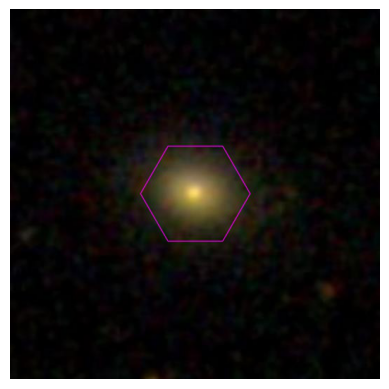

In [176]:
# https://docs.astropy.org/en/stable/visualization/wcsaxes/slicing_datacubes.html
ax = plt.subplot(projection=wcs, slices=('x', 'y', 0))
# not sure why the header creates a wcs with a third axis of dimension 3
# but I assume it's somehow for the color, which I include via mpl instead
ax.imshow(data[0].data)
# TODO add second image data and instead of imshow,project and dump to pixels
# see WCS docs, may be easier outside of mpl
# ax.axis(False)

In [174]:
cutout_example = fits.open('/Users/user/repos/zoobot-3d/cutout_190.1086_1.2005.fits')
cutout_example.info()

Filename: /Users/user/repos/zoobot-3d/cutout_190.1086_1.2005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (256, 256, 3)   float32   


In [175]:
cutout_example[0].data

array([[[ 8.06100890e-02,  7.86130428e-02,  8.61593485e-02, ...,
         -2.17048475e-03, -5.10988850e-03,  3.03332368e-03],
        [ 7.76261315e-02,  8.08487236e-02,  8.75770450e-02, ...,
          3.46928355e-05, -2.19178107e-03,  9.62355698e-04],
        [ 8.05222616e-02,  7.82172978e-02,  8.70928243e-02, ...,
          1.97257134e-04,  3.45902408e-05, -2.19633034e-03],
        ...,
        [-1.67840946e-04, -8.78172694e-04,  2.33520521e-03, ...,
         -1.59343262e-03,  1.91737653e-03, -5.14956890e-03],
        [ 2.80568958e-03,  2.43955501e-03,  4.02631052e-03, ...,
          7.12904439e-04, -3.04611586e-03, -1.07002782e-03],
        [-1.93181168e-03, -1.01562694e-03, -8.42194422e-04, ...,
          1.32275645e-05,  3.47226905e-03,  4.04979335e-03]],

       [[ 1.55427754e-01,  1.57119766e-01,  1.71979636e-01, ...,
         -6.05823239e-03, -4.91217710e-03,  2.92650843e-03],
        [ 1.59130588e-01,  1.54036552e-01,  1.64569125e-01, ...,
          1.96752325e-03,  2.23878399e